# Diabetes Prediction Model

This code implements a diabetes prediction model using machine learning techniques. Here's an overview of the code:

## Data Preprocessing and Analysis

- The code begins by installing the required packages (`pandas`, `numpy`, `scikit-learn`, and `matplotlib`) using pip.
- The dataset is loaded into a pandas DataFrame (`df`) from a CSV file.
- Basic data exploration is performed, including displaying the first few rows of the dataset, getting information about the dataset, and checking for missing values and duplicated rows.
- Duplicate rows are dropped from the dataset.
- Histograms and other visualizations are created to explore the distribution of variables in the dataset.
- Data cleaning and mapping are performed on the 'gender' and 'smoking_history' columns.
- Correlation analysis is conducted, and a correlation matrix is plotted using a heatmap.

## Feature Selection

- Feature selection is performed to identify the most relevant features for the diabetes prediction model.
- The `SelectKBest` class from scikit-learn is used with ANOVA F-value as the scoring function to select the top k features.
- The selected features are printed.

## Data Standardization

- The selected features are standardized using the `StandardScaler` from scikit-learn.
- A new DataFrame (`df_scaled`) is created with the standardized values, and the 'diabetes' column is concatenated.
- Rows with missing values are dropped, and the index of the DataFrame is reset.

## Model Training and Evaluation

- The data is split into training and testing sets using the `train_test_split` function from scikit-learn.
- A support vector machine (SVM) model is created using the `SVC` class from scikit-learn.
- The model is trained on the training set and evaluated on the testing set using accuracy as the performance metric.
- The trained SVM model is saved to a pickle file.

This markdown provides an overview of the code and its different sections, highlighting the data preprocessing, feature selection, model training, and evaluation steps.


In [1]:
!pip install pandas
!pip install numpy 
!pip install scikit-learn 
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploritery data analysis

In [3]:
# Read the diabetes dataset
df=pd.read_csv('diabetes_prediction_dataset.csv')
# Display the first few rows of the dataset
print(df.head())
print('_________________________________________________________________')
# Display last few rows of the dataset
print(df.tail())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           Never  25.19   
1  Female  54.0             0              0           Never  27.32   
2    Male  28.0             0              0           Never  27.32   
3  Female  36.0             0              0         Current  23.45   
4    Male  76.0             1              1         Current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                140.0       0.0  
1          6.6                 80.0       0.0  
2          5.7                158.0       0.0  
3          5.0                155.0       0.0  
4          4.8                155.0       0.0  
_________________________________________________________________
       gender   age  hypertension  heart_disease smoking_history    bmi  \
99978  Female   2.0             0              0           Never  17.37   
99979    Male  66.0             0              0          Former  27.

In [4]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99983 entries, 0 to 99982
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               99983 non-null  object 
 1   age                  99983 non-null  float64
 2   hypertension         99983 non-null  int64  
 3   heart_disease        99983 non-null  int64  
 4   smoking_history      99983 non-null  object 
 5   bmi                  99983 non-null  float64
 6   HbA1c_level          99983 non-null  float64
 7   blood_glucose_level  99983 non-null  float64
 8   diabetes             99983 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 6.9+ MB


In [5]:
# Get statistical summary of the dataset
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,99983.000000,99983.000000,99983.000000,99983.000000,99983.000000,99983.000000,99983.000000
mean,41.887667,0.074863,0.039427,27.320484,5.527474,138.056430,0.085014
std,22.517465,0.263171,0.194609,6.637380,1.070799,40.711607,0.278905
min,0.080000,0.000000,0.000000,0.050000,0.060000,0.010000,0.000000
25%,24.000000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.000000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
# Check for missing values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
# Check for duplicated rows
df.duplicated().sum()

5989

In [8]:
# Drop duplicate rows
df = df.drop_duplicates()

<Axes: >

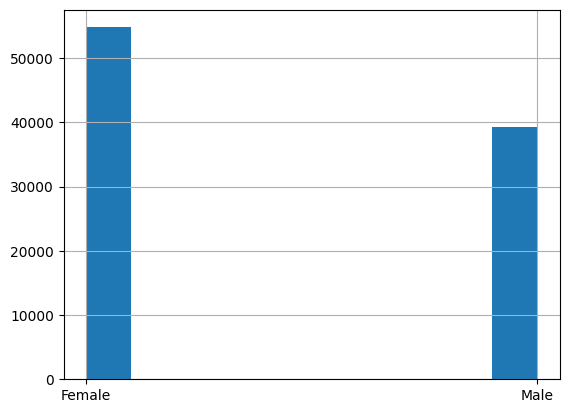

In [9]:
# Plot histograms for the 'gender', 'age', and 'smoking_history' columns
df['gender'].hist()

<Axes: >

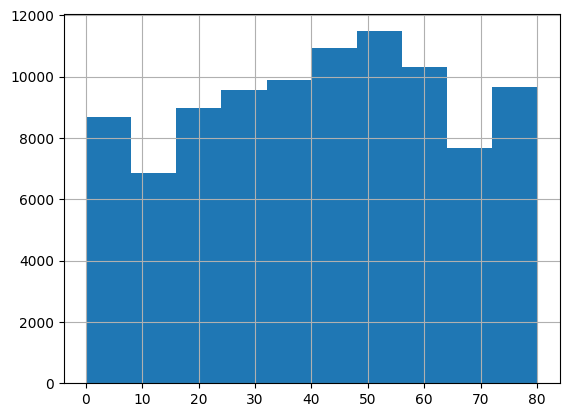

In [10]:
df['age'].hist()

<Axes: >

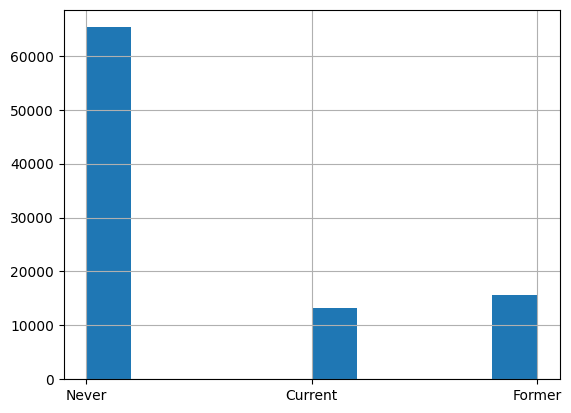

In [11]:
df['smoking_history'].hist()

<Axes: ylabel='Density'>

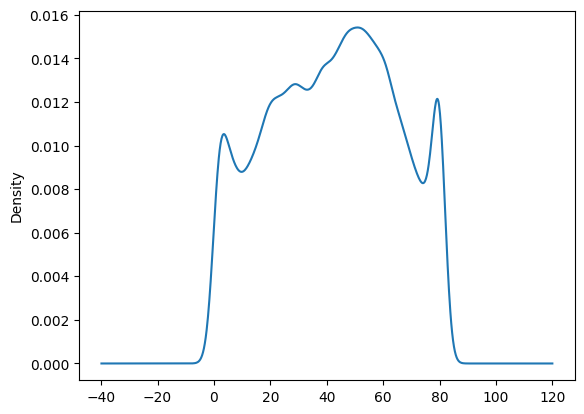

In [12]:
# Plot density plot for the 'age' column
df['age'].plot(kind='density')

<Axes: xlabel='gender'>

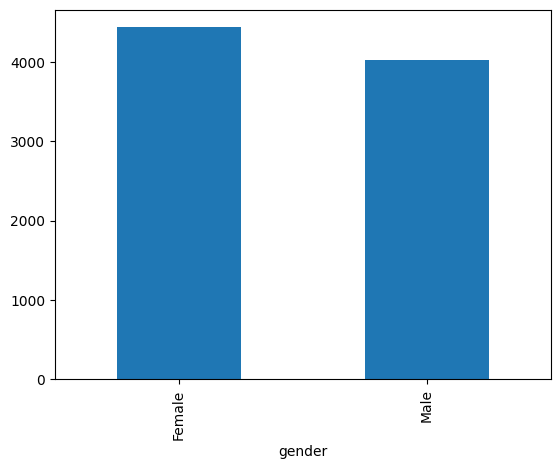

In [13]:
# Plot bar chart for the count of 'gender' among diabetes cases
diabetes_data = df[df['diabetes'] == 1]
count = diabetes_data['gender'].value_counts()
count.plot(kind='bar')

In [14]:
# Remove rows with 'gender' value as 'Other'
df = df[df['gender'] != 'Other']

In [15]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,Never,25.19,6.6,140.0,0.0
1,Female,54.0,0,0,Never,27.32,6.6,80.0,0.0
2,Male,28.0,0,0,Never,27.32,5.7,158.0,0.0
3,Female,36.0,0,0,Current,23.45,5.0,155.0,0.0
4,Male,76.0,1,1,Current,20.14,4.8,155.0,0.0


<Axes: xlabel='smoking_history'>

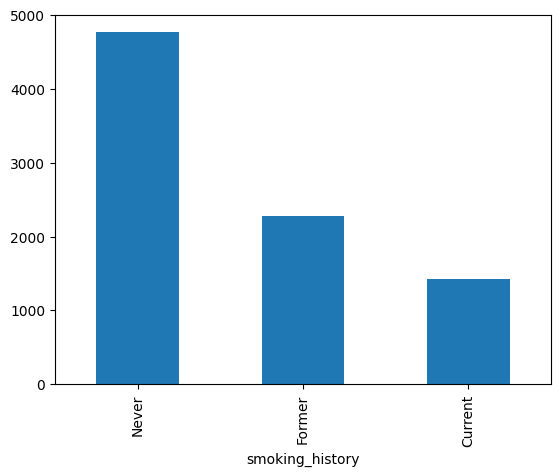

In [16]:
# Plot bar chart for the count of 'smoking_history' among diabetes cases
diabetes_data = df[df['diabetes'] == 1]
count = diabetes_data['smoking_history'].value_counts()
count.plot(kind='bar')

In [17]:
count

smoking_history
Never      4765
Former     2280
Current    1420
Name: count, dtype: int64

In [18]:
# Combine categories in the 'smoking_history' column
df.loc[df['smoking_history'].isin(['never', 'No Info']), 'smoking_history'] = 'Never'
df.loc[df['smoking_history'].isin(['former', 'not current']), 'smoking_history'] = 'Former'
df.loc[df['smoking_history'].isin(['current', 'ever']), 'smoking_history'] = 'Current'

In [19]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,Never,25.19,6.6,140.0,0.0
1,Female,54.0,0,0,Never,27.32,6.6,80.0,0.0
2,Male,28.0,0,0,Never,27.32,5.7,158.0,0.0
3,Female,36.0,0,0,Current,23.45,5.0,155.0,0.0
4,Male,76.0,1,1,Current,20.14,4.8,155.0,0.0


<Axes: title={'center': 'age'}, xlabel='diabetes'>

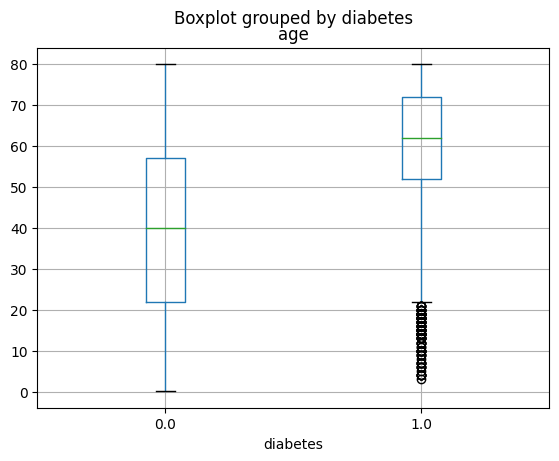

In [20]:
# Create a boxplot of 'age' grouped by 'diabetes'
df.boxplot(column='age', by='diabetes')

<Axes: xlabel='blood_glucose_level', ylabel='HbA1c_level'>

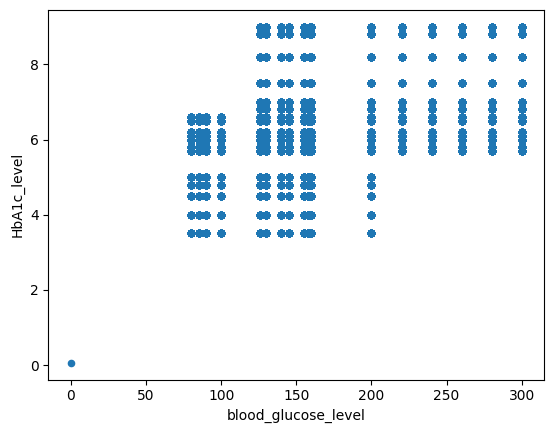

In [21]:
# Create a scatter plot of 'blood_glucose_level' vs 'HbA1c_level'
df.plot.scatter(x='blood_glucose_level', y='HbA1c_level')

In [22]:
# Create mapping dictionaries for 'gender' and 'smoking_history'
gender_mapping = {'Male': 0, 'Female': 1}
smoking_mapping = {'Never': 0, 'Former': 1, 'Current': 2}
# Map 'gender' and 'smoking_history' to their respective numeric values
df.loc[:, 'gender'] = df['gender'].map(gender_mapping)
df.loc[:, 'smoking_history'] = df['smoking_history'].map(smoking_mapping)

In [23]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,0,25.19,6.60,140.00,0.0
1,1,54.0,0,0,0,27.32,6.60,80.00,0.0
2,0,28.0,0,0,0,27.32,5.70,158.00,0.0
3,1,36.0,0,0,2,23.45,5.00,155.00,0.0
4,0,76.0,1,1,2,20.14,4.80,155.00,0.0
...,...,...,...,...,...,...,...,...,...
99978,1,2.0,0,0,0,17.37,6.50,100.00,0.0
99979,0,66.0,0,0,1,27.83,5.70,155.00,0.0
99980,1,24.0,0,0,0,35.42,4.00,100.00,0.0
99981,1,57.0,0,0,2,22.43,6.60,90.00,0.0


In [24]:
# Compute correlation matrix
correlation_matrix = df.corr()

In [25]:
correlation_matrix

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,0.027753,-0.014172,-0.079040,-0.042433,0.023762,-0.019927,-0.018404,-0.037602
age,0.027753,1.000000,0.259394,0.240519,0.182451,0.347986,0.109631,0.116229,0.267438
hypertension,-0.014172,0.259394,1.000000,0.119245,0.055006,0.148445,0.081879,0.085124,0.194780
heart_disease,-0.079040,0.240519,0.119245,1.000000,0.065925,0.061486,0.068564,0.071366,0.170210
smoking_history,-0.042433,0.182451,0.055006,0.065925,1.000000,0.127169,0.027277,0.031420,0.069282
bmi,0.023762,0.347986,0.148445,0.061486,0.127169,1.000000,0.085496,0.093502,0.215369
HbA1c_level,-0.019927,0.109631,0.081879,0.068564,0.027277,0.085496,1.000000,0.174433,0.409496
blood_glucose_level,-0.018404,0.116229,0.085124,0.071366,0.031420,0.093502,0.174433,1.000000,0.427421
diabetes,-0.037602,0.267438,0.194780,0.170210,0.069282,0.215369,0.409496,0.427421,1.000000


Text(50.58159722222221, 0.5, 'Variables')

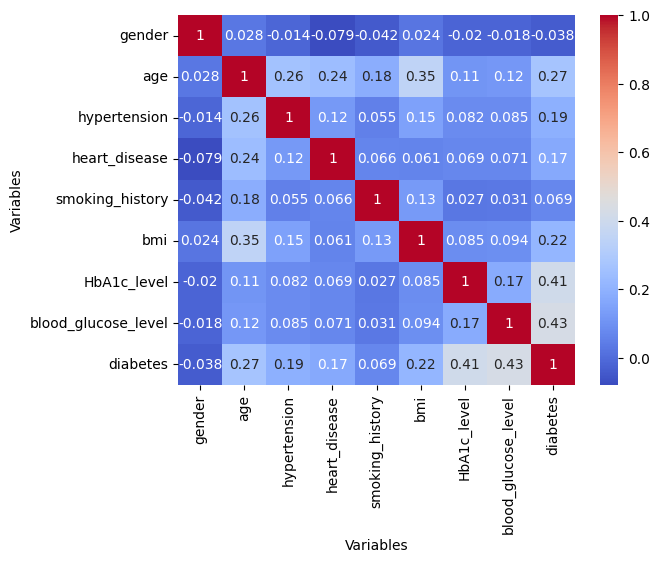

In [26]:
# Plot heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the axis labels
plt.xlabel('Variables')
plt.ylabel('Variables')

 In the above corrletion matrix foolowing colunms show positive corrleation with diabetes
* Age: Age has a positive correlation with diabetes (0.257999), indicating that older individuals are more likely to have diabetes.

* Hypertension: Hypertension (0.197811) shows a positive correlation with diabetes. People with hypertension may have an increased risk of developing diabetes.

* Heart Disease: Heart disease (0.171718) has a positive correlation with diabetes. Individuals with heart disease may be more prone to developing diabetes.

* BMI: BMI (0.214377) shows a positive correlation with diabetes. Higher BMI values are associated with an increased risk of diabetes.

* HbA1c_level: HbA1c_level (0.400696) has a relatively stronger positive correlation with diabetes. HbA1c is a measure of long-term blood sugar control, and higher levels indicate an increased risk of diabetes.

* Blood Glucose Level: Blood glucose level (0.419587) has a relatively stronger positive correlation with diabetes. Elevated blood glucose levels are a key indicator of diabetes.

Using these columns as features in My binary classification model can potentially help in predicting diabetes. 

In [27]:
df


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,0,25.19,6.60,140.00,0.0
1,1,54.0,0,0,0,27.32,6.60,80.00,0.0
2,0,28.0,0,0,0,27.32,5.70,158.00,0.0
3,1,36.0,0,0,2,23.45,5.00,155.00,0.0
4,0,76.0,1,1,2,20.14,4.80,155.00,0.0
...,...,...,...,...,...,...,...,...,...
99978,1,2.0,0,0,0,17.37,6.50,100.00,0.0
99979,0,66.0,0,0,1,27.83,5.70,155.00,0.0
99980,1,24.0,0,0,0,35.42,4.00,100.00,0.0
99981,1,57.0,0,0,2,22.43,6.60,90.00,0.0


In [28]:
# Selected features based on correlation matrix analysis:
# 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level'

import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

# Select the columns of interest for feature selection
selected_columns = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Create a new DataFrame with only the selected columns
selected_features = df[selected_columns]

# Separate the features and target variable
X = selected_features
y = df['diabetes']

# Perform feature selection using SelectKBest with ANOVA F-value
k = 4  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Print the selected feature names
print("Selected Features:", selected_features)

Selected Features: Index(['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'], dtype='object')


In [29]:
from sklearn.preprocessing import StandardScaler

# Create a new DataFrame with only the selected columns
df_selected = df[selected_features].copy()

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the selected columns
df_selected_scaled = scaler.fit_transform(df_selected)

# Create a new DataFrame with the standardized values
df_scaled = pd.DataFrame(df_selected_scaled, columns=selected_features)

# Concatenate the standardized columns with the 'diabetes' column
df_new = pd.concat([df_scaled, df['diabetes']], axis=1)

# Drop rows with missing values
df_new = df_new.dropna()

# Reset the index of the DataFrame
df_new = df_new.reset_index(drop=True)

In [30]:
df_new.describe()

,age,bmi,HbA1c_level,blood_glucose_level,diabetes
count,88601.000000,88601.000000,88601.000000,88601.000000,88601.000000
mean,0.000279,0.000842,0.001156,0.000275,0.089525
std,0.999526,1.001135,0.999246,1.000791,0.285502
min,-1.852337,-3.984599,-5.093565,-3.370502,0.000000
25%,-0.789489,-0.591981,-0.684042,-0.933459,0.000000
50%,0.054747,-0.000245,0.246237,0.041456,0.000000
75%,0.810115,0.391323,0.618349,0.504540,0.000000
max,1.698784,9.989130,3.223130,3.941114,1.000000


In [31]:
df_new = df_new.dropna()

# Reset the index of the DataFrame
df_new = df_new.reset_index(drop=True)

In [32]:
df= df_new

In [33]:
df

,age,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.698784,-0.311454,0.990460,0.041456,0.0
1,0.543515,-0.000245,0.990460,-1.420916,0.0
2,-0.611755,-0.000245,0.153209,0.480167,0.0
3,-0.256287,-0.565682,-0.497986,0.407049,0.0
4,1.521050,-1.049298,-0.684042,0.407049,0.0
...,...,...,...,...,...
88596,-0.256287,-0.397658,-0.684042,0.163320,0.0
88597,-1.767024,-1.454016,0.897433,-0.933459,0.0
88598,1.076716,0.074270,0.153209,0.407049,0.0
88599,-0.789489,1.183226,-1.428265,-0.933459,0.0


## Model Creation

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pickle

def model(X_train, X_test, y_train, y_test):
    # Create an SVM model
    svm_model = SVC()

    # Train the model
    svm_model.fit(X_train, y_train)

    # Predict the target variable for the test set
    y_pred = svm_model.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Save the model to a pickle file
    with open("svm_model.pkl", "wb") as f:
        pickle.dump(svm_model, f)

# Split the data into features (X) and target variable (y)
X = df[selected_features]
y = df['diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and save the SVM model
model(X_train, X_test, y_train, y_test)

Accuracy: 0.914903222165792
